In [1]:
import numpy as np
import pandas as pd
import pylab as pl 
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Reading in data
url = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/'
df = pd.read_csv(url + 'NYPD_7_Major_Felony_Incidents.csv')
df.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,1107108,3d8920cf,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,6,17,2015,RAPE,FELONY,A,101,QUEENS,N.Y. POLICE DEPT,1053678,159044,"(40.6029515910001, -73.749976261)"
1,1107109,8c295251,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,3,1,2015,GRAND LARCENY,FELONY,H,62,BROOKLYN,N.Y. POLICE DEPT,983057,163228,"(40.6147076880001, -74.0042984409999)"
2,1107110,303d301b,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,4,9,2015,RAPE,FELONY,C,66,BROOKLYN,N.Y. POLICE DEPT,986633,167258,"(40.6257689610001, -73.991416822)"
3,1107111,3edb706a,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,3,1,2015,GRAND LARCENY OF MOTOR VEHICLE,FELONY,A,121,STATEN ISLAND,N.Y. POLICE DEPT,936734,171157,"(40.63634376, -74.171202292)"
4,1107193,94d0b3da,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,3,19,2015,GRAND LARCENY,FELONY,G,71,BROOKLYN,N.Y. POLICE DEPT,1002927,182323,"(40.6670997620001, -73.932676944)"


In [3]:
df['Date'] = pd.to_datetime(df['Occurrence Date'])
df['Month'] = df['Date'].dt.month

In [4]:
df.Offense.value_counts()

GRAND LARCENY                     35979
FELONY ASSAULT                    17572
ROBBERY                           14402
BURGLARY                          12793
GRAND LARCENY OF MOTOR VEHICLE     6292
RAPE                                999
MURDER & NON-NEGL. MANSLAUGHTE      282
Name: Offense, dtype: int64

In [5]:
df['Month'] = df['Month'].map({3: 'March', 4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
df['Offense'] = df['Offense'].map({'RAPE':'RAPE','GRAND LARCENY':'LARCENY','ROBBERY':'ROBBERY','GRAND LARCENY OF MOTOR VEHICLE':'GTA','MURDER & NON-NEGL. MANSLAUGHTE': 'MURDER', 'FELONY ASSAULT':'ASSAULT', 'BURGLARY':'BURGLARY'})
df = df[['Offense','Month']]

In [6]:
df.head()

,Offense,Month
0,RAPE,March
1,LARCENY,March
2,RAPE,March
3,GTA,March
4,LARCENY,March


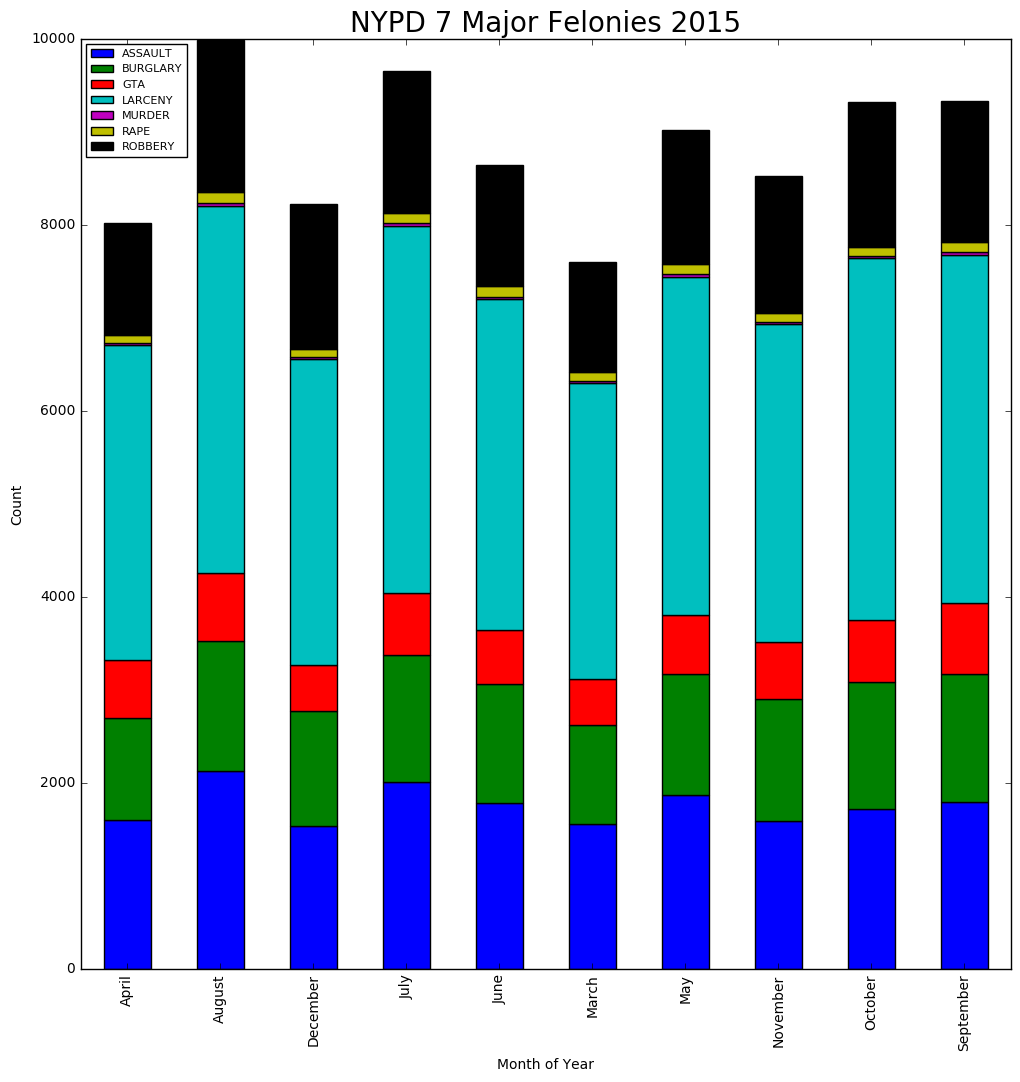

In [14]:
offense_table = pd.crosstab(index=df['Month'], 
                          columns=df['Offense'])

offense_table.plot(kind="bar", 
                 figsize=(12,12),
                stacked = True)

pl.title('NYPD 7 Major Felonies 2015', fontsize = 20)
pl.xlabel('Month of Year')
pl.ylabel('Count')
pl.legend(loc = 'upper left', fontsize = 8)

Figure 1: The figure above is a depiction of NYPD 7 Major Felonies of 2015 data. Each bar is a representation of the felonies taking place each month, segmented by felony type. 